In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

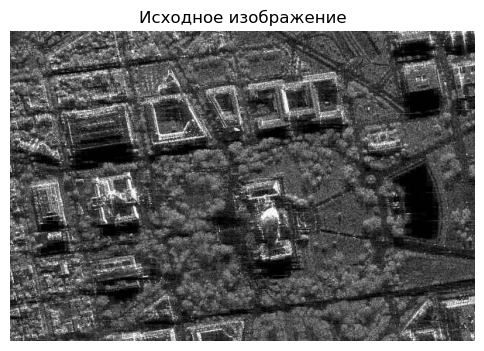

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

img = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

1. Построение гистограммы

Text(0, 0.5, 'Количество пикселей')

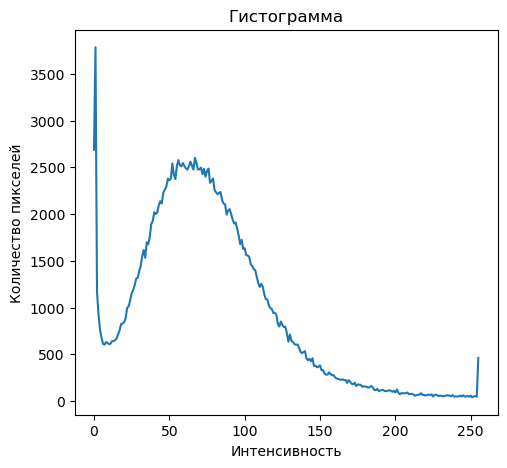

In [3]:
plt.figure(figsize=(12,5))

#обычная гистограмма
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.subplot(1,2,1)
plt.plot(hist)
plt.title("Гистограмма")
plt.xlabel("Интенсивность")
plt.ylabel("Количество пикселей")

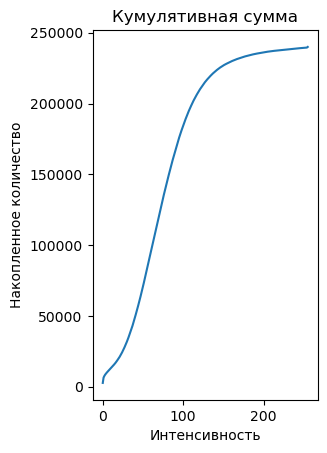

In [4]:
hist_cum = hist.cumsum()

plt.subplot(1,2,1)
plt.plot(hist_cum)
plt.title("Кумулятивная сумма")
plt.xlabel("Интенсивность")
plt.ylabel("Накопленное количество")

plt.show()

2. Гамма-коррекция (γ < 1 и γ > 1)

γ < 1

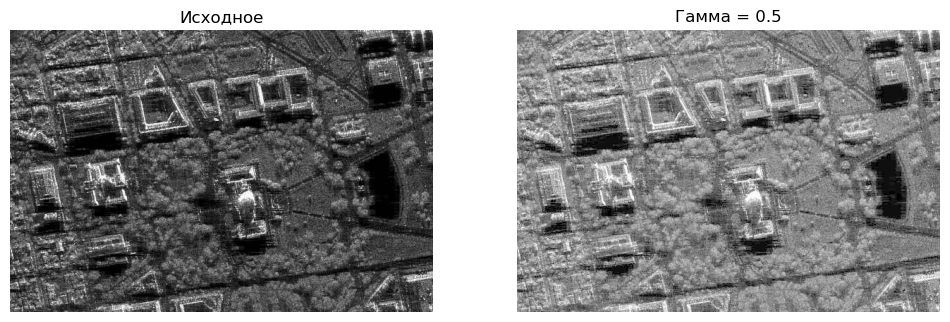

MSE (γ=0.5): 3250.4291
SSIM (γ=0.5): 0.7875


In [5]:
gamma1 = 0.5
gamma_corrected1 = np.array(255 * (img / 255.0) ** gamma1, dtype='uint8')

mse1 = mean_squared_error(img, gamma_corrected1)
ssim1 = ssim(img, gamma_corrected1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gamma_corrected1, cmap='gray')
plt.title(f"Гамма = {gamma1}")
plt.axis('off')

plt.show()

print(f"MSE (γ={gamma1}): {mse1:.4f}")
print(f"SSIM (γ={gamma1}): {ssim1:.4f}")

γ > 1

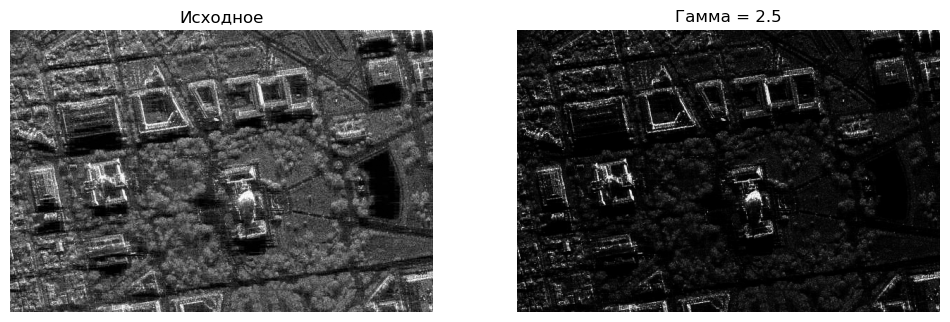

MSE (γ=2.5): 3556.5202
SSIM (γ=2.5): 0.3285


In [6]:
gamma2 = 2.5
gamma_corrected2 = np.array(255 * (img / 255.0) ** gamma2, dtype='uint8')

mse2 = mean_squared_error(img, gamma_corrected2)
ssim2 = ssim(img, gamma_corrected2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gamma_corrected2, cmap='gray')
plt.title(f"Гамма = {gamma2}")
plt.axis('off')

plt.show()

print(f"MSE (γ={gamma2}): {mse2:.4f}")
print(f"SSIM (γ={gamma2}): {ssim2:.4f}")

3. Статистическая цветокоррекция на основе eq_gray

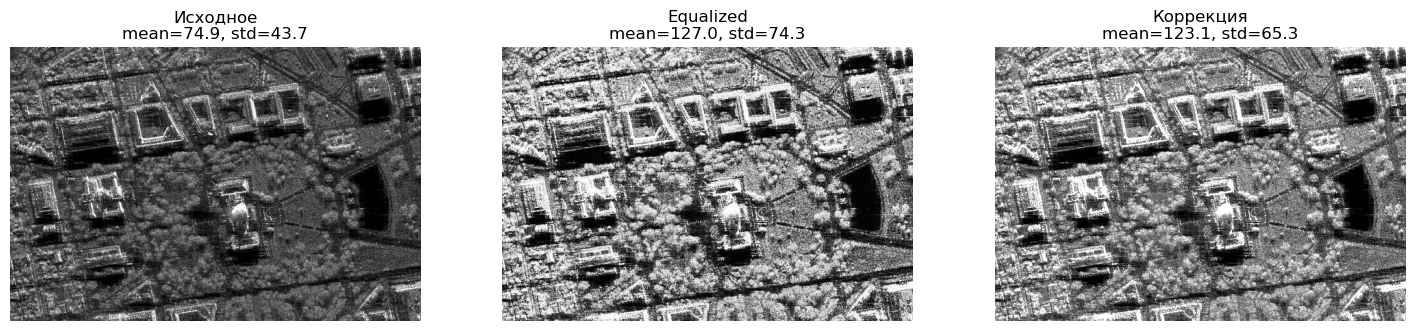

In [7]:
#гистограммное выравнивание
eq_gray = cv2.equalizeHist(img)

#статистика
mean = img.mean()
std = img.std()

mean_eq = eq_gray.mean()
std_eq = eq_gray.std()

#статистическая коррекция
corrected_img = mean_eq + (img.astype(np.float32) - mean) * (std_eq / std)
corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

#новая статистика
mean_corr = corrected_img.mean()
std_corr = corrected_img.std()

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title(f"Исходное\nmean={mean:.1f}, std={std:.1f}")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(eq_gray, cmap='gray')
plt.title(f"Equalized\nmean={mean_eq:.1f}, std={std_eq:.1f}")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(corrected_img, cmap='gray')
plt.title(f"Коррекция\nmean={mean_corr:.1f}, std={std_corr:.1f}")
plt.axis('off')

plt.show()

4. Пороговая фильтрация

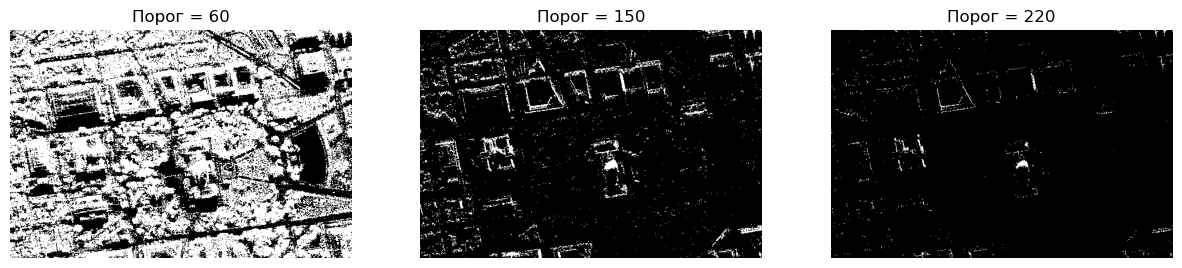

In [8]:
thresholds = [60, 150, 220]

plt.figure(figsize=(15,5))

for i, t in enumerate(thresholds):
    _, thresh = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    
    plt.subplot(1, len(thresholds), i+1)
    plt.imshow(thresh, cmap='gray')
    plt.title(f"Порог = {t}")
    plt.axis('off')

plt.show()